In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cpu is available


In [4]:
df = pd.read_csv('Nickel_Final_DB.csv')

In [5]:
df1 = pd.read_csv('final_df.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2843 non-null   datetime64[ns]
 1   Price          2843 non-null   float64       
 2   Y2_Price       2843 non-null   float64       
 3   Y10_Price      2843 non-null   float64       
 4   UC_Price       2843 non-null   float64       
 5   EU_Price       2843 non-null   float64       
 6   GB_Price       2843 non-null   float64       
 7   JP_Price       2843 non-null   float64       
 8   NetWeight      2843 non-null   int64         
 9   TradeValue     2843 non-null   float64       
 10  WTI_Price      2843 non-null   float64       
 11  B_Price        2843 non-null   float64       
 12  Gas_Price      2843 non-null   float64       
 13  heating_Price  2843 non-null   float64       
 14  NAV            2843 non-null   float64       
 15  Dollor_Price   2843 n

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2792 non-null   datetime64[ns]
 1   Price             2792 non-null   int64         
 2   Change %          2792 non-null   float64       
 3   Y2_Price          2792 non-null   float64       
 4   Y2_Change         2792 non-null   float64       
 5   Y10_Price         2792 non-null   float64       
 6   Y10_Change        2792 non-null   float64       
 7   UC_Price          2792 non-null   float64       
 8   UC_Change         2792 non-null   float64       
 9   EU_Price          2792 non-null   float64       
 10  EU_Change         2792 non-null   float64       
 11  GB_Price          2792 non-null   float64       
 12  GB_Change         2792 non-null   float64       
 13  JP_Price          2792 non-null   float64       
 14  JP_Change         2792 n

In [8]:
df.columns

Index(['Date', 'Price', 'Y2_Price', 'Y10_Price', 'UC_Price', 'EU_Price',
       'GB_Price', 'JP_Price', 'NetWeight', 'TradeValue', 'WTI_Price',
       'B_Price', 'Gas_Price', 'heating_Price', 'NAV', 'Dollor_Price', 'Stock',
       'STS_price', 'Current_Price'],
      dtype='object')

In [9]:
df1.columns

Index(['Date', 'Price', 'Change %', 'Y2_Price', 'Y2_Change', 'Y10_Price',
       'Y10_Change', 'UC_Price', 'UC_Change', 'EU_Price', 'EU_Change',
       'GB_Price', 'GB_Change', 'JP_Price', 'JP_Change', 'KR_Price',
       'KR_Change', 'NetWeight', 'TradeValue', 'WTI_Price', 'WTI_Change',
       'B_Price', 'B_Change', 'Price_y', 'Change %_y', 'Gas_Price',
       'Gas_Change %', 'heating_Price', 'heating_Change %', 'NAV',
       'Dollor_Price', 'Dollor_Change %', 'Stock', 'STS_price'],
      dtype='object')

In [9]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Price', 'Y2_Price', 'Y10_Price', 'UC_Price', 'EU_Price',
       'GB_Price', 'JP_Price', 'NetWeight', 'TradeValue', 'WTI_Price',
       'B_Price', 'Gas_Price', 'heating_Price', 'NAV', 'Dollor_Price', 'Stock',
       'STS_price', 'Current_Price']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled

,Price,Y2_Price,Y10_Price,UC_Price,EU_Price,GB_Price,JP_Price,NetWeight,TradeValue,WTI_Price,B_Price,Gas_Price,heating_Price,NAV,Dollor_Price,Stock,STS_price,Current_Price
0,0.238627,0.179847,0.876279,0.497450,0.266528,0.079199,0.113516,0.079803,0.282793,0.787268,0.682927,0.425557,0.419028,0.831081,0.201149,0.179010,0.181049,0.494970
1,0.233182,0.210181,0.915039,0.508264,0.297335,0.083636,0.134073,0.079803,0.282793,0.792971,0.701058,0.399386,0.426917,0.843243,0.226880,0.178936,0.181049,0.480091
2,0.230650,0.199372,0.895194,0.514419,0.326064,0.085787,0.136256,0.079803,0.282793,0.781070,0.692039,0.394178,0.420066,0.827928,0.243512,0.179380,0.181049,0.486467
3,0.225831,0.171478,0.873178,0.516089,0.346833,0.080947,0.133164,0.079803,0.282793,0.778900,0.681086,0.392576,0.414564,0.831532,0.250416,0.179025,0.181049,0.471447
4,0.221298,0.163110,0.860465,0.523738,0.338872,0.080005,0.125523,0.079803,0.282793,0.786463,0.702899,0.389505,0.429989,0.841892,0.246336,0.178804,0.181049,0.463086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,0.258093,0.828278,0.695194,0.537893,0.889581,0.901304,0.927415,0.004249,0.026787,0.917126,0.840865,1.000000,0.719558,0.404505,0.905011,0.019557,1.000000,0.526286
2839,0.261332,0.835704,0.694264,0.571830,0.905504,0.906010,0.936693,0.004249,0.026787,0.940433,0.844823,0.991588,0.742011,0.399550,0.911507,0.020739,1.000000,0.538898
2840,0.266914,0.827266,0.691473,0.612625,0.892004,0.910044,0.933600,0.004249,0.026787,0.946507,0.872895,0.967419,0.749724,0.409459,0.904635,0.020000,1.000000,0.562279
2841,0.281697,0.829393,0.691783,0.577457,0.891312,0.913003,0.933054,0.004249,0.026787,0.949854,0.921307,0.979169,0.732398,0.415766,0.899614,0.019852,1.000000,0.570781


In [21]:
X1 = df_scaled[['Y2_Price', 'Y10_Price', 'UC_Price', 'EU_Price',
       'GB_Price', 'JP_Price', 'NetWeight', 'TradeValue', 'WTI_Price',
       'B_Price', 'Gas_Price', 'heating_Price', 'NAV', 'Dollor_Price', 'Stock',
       'STS_price']].values
y1 = df_scaled['Price'].values

In [22]:
def seq_data(x, y, sequence_length):
  
    x_seq = []
    y_seq = []
    for i in range(len(x) - sequence_length):
        x_seq.append(x[i: i+sequence_length])
        y_seq.append(y[i+sequence_length])

    return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view([-1, 1]) 
    # float형 tensor로 변형, gpu사용가능하게 .to(device)를 사용.

In [23]:
split = 1500
sequence_length = 5

x1_seq, y1_seq = seq_data(X1, y1, sequence_length)

x1_train_seq = x1_seq[:split]
y1_train_seq = y1_seq[:split]
x1_test_seq = x1_seq[split:]
y1_test_seq = y1_seq[split:]
print(x1_train_seq.size(), y1_train_seq.size())
print(x1_test_seq.size(), y1_test_seq.size())

torch.Size([1500, 5, 16]) torch.Size([1500, 1])
torch.Size([1338, 5, 16]) torch.Size([1338, 1])


In [24]:
train1 = torch.utils.data.TensorDataset(x1_train_seq, y1_train_seq)
test1 = torch.utils.data.TensorDataset(x1_test_seq, y1_test_seq)

batch_size = 20
train_loader1 = torch.utils.data.DataLoader(dataset=train1, batch_size=batch_size, shuffle=False)
test_loader1 = torch.utils.data.DataLoader(dataset=test1, batch_size=batch_size, shuffle=False)

In [25]:
input_size = x1_seq.size(2)
num_layers = 2
hidden_size = 8

In [26]:
class VanillaRNN(nn.Module):

    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(VanillaRNN, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size * sequence_length, 1), nn.Sigmoid())

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 초기 hidden state 설정하기.
        out, _ = self.rnn(x, h0) # out: RNN의 마지막 레이어로부터 나온 output feature 를 반환한다. hn: hidden state를 반환한다.
        out = out.reshape(out.shape[0], -1) # many to many 전략
        out = self.fc(out)
        return out
model = VanillaRNN(input_size=input_size,
                   hidden_size=hidden_size,
                   sequence_length=sequence_length,
                   num_layers=num_layers,
                   device=device).to(device)

In [27]:
criterion = nn.MSELoss()

lr = 1e-3
num_epochs = 1000
optimizer = optim.Adam(model.parameters(), lr=lr)

In [28]:
loss_graph = [] # 그래프 그릴 목적인 loss.
n = len(train_loader1)

for epoch in range(num_epochs):
    running_loss = 0.0

    for data in train_loader1:

        seq, target = data # 배치 데이터.
        out = model(seq)   # 모델에 넣고,
        loss = criterion(out, target) # output 가지고 loss 구하고,

        optimizer.zero_grad()
        loss.backward() # loss가 최소가 되게하는 
        optimizer.step() # 가중치 업데이트 해주고,
        running_loss += loss.item() # 한 배치의 loss 더해주고,

    loss_graph.append(running_loss / n) # 한 epoch에 모든 배치들에 대한 평균 loss 리스트에 담고,
    if epoch % 50 == 0:
        print('[epoch: %d] loss: %.5f'%(epoch, running_loss/n))

[epoch: 0] loss: 0.06047
[epoch: 50] loss: 0.00071
[epoch: 100] loss: 0.00036
[epoch: 150] loss: 0.00024
[epoch: 200] loss: 0.00017
[epoch: 250] loss: 0.00022
[epoch: 300] loss: 0.00014
[epoch: 350] loss: 0.00013
[epoch: 400] loss: 0.00011
[epoch: 450] loss: 0.00012
[epoch: 500] loss: 0.00018
[epoch: 550] loss: 0.00017
[epoch: 600] loss: 0.00008
[epoch: 650] loss: 0.00008
[epoch: 700] loss: 0.00019
[epoch: 750] loss: 0.00011
[epoch: 800] loss: 0.00012
[epoch: 850] loss: 0.00038
[epoch: 900] loss: 0.00020
[epoch: 950] loss: 0.00017


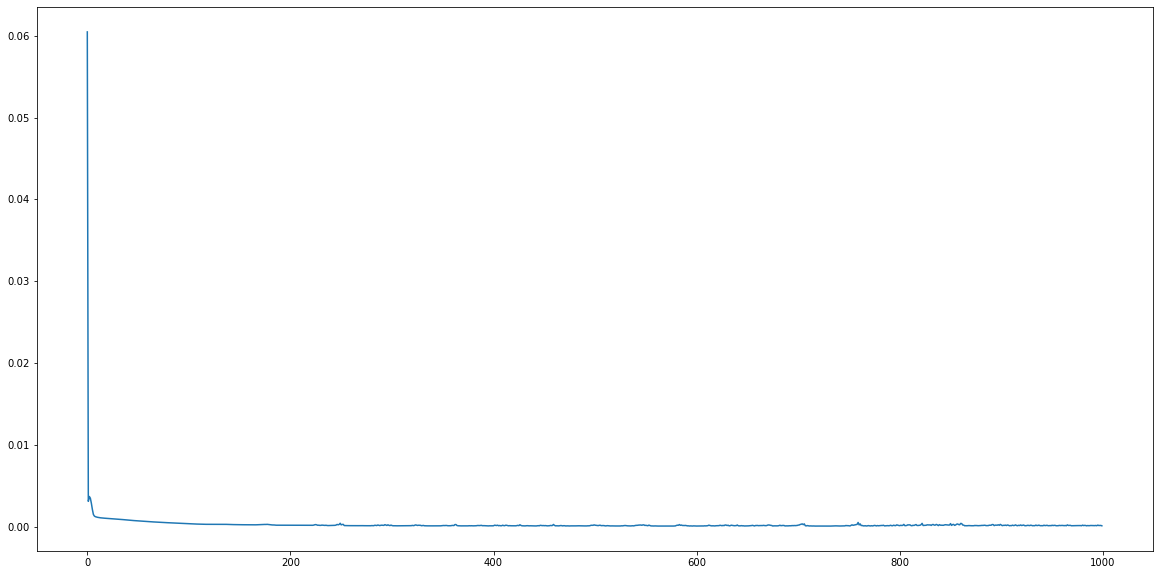

In [29]:
plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.show()

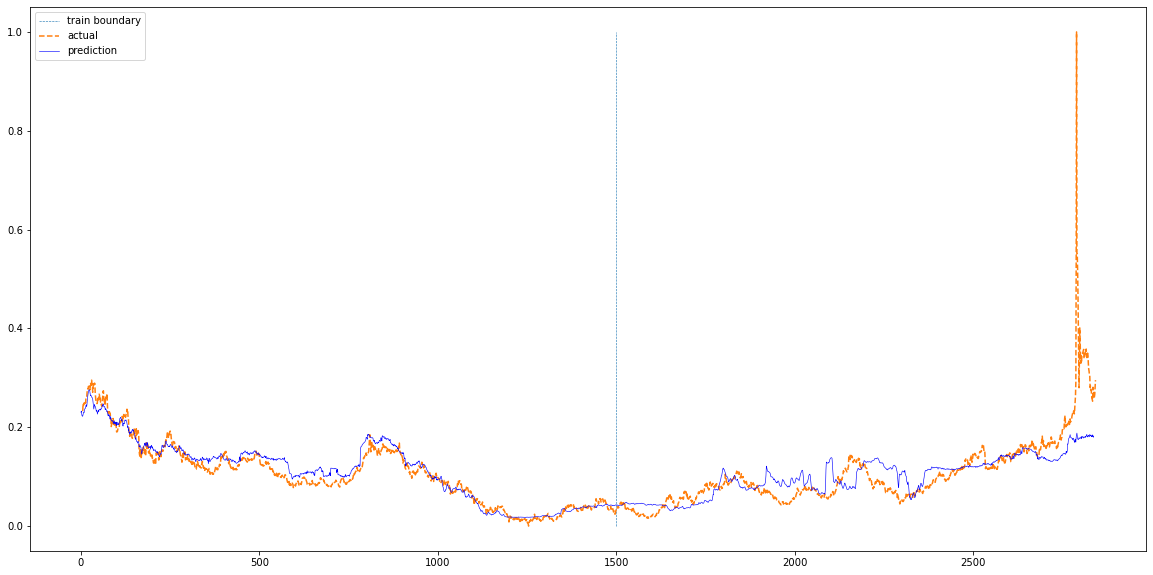

In [30]:
def plotting(train_loader, test_loader, actual):
        
    with torch.no_grad():
        train_pred = []
        test_pred = []

        for data in train_loader:
            seq, target = data
            out = model(seq)
            train_pred += out.cpu().numpy().tolist()

        for data in test_loader:
            seq, target = data
            out = model(seq)
            test_pred += out.cpu().numpy().tolist()
      
    total = train_pred + test_pred
    plt.figure(figsize=(20,10))
    plt.plot(np.ones(100)*len(train_pred), np.linspace(0,1,100), '--', linewidth=0.6)
    plt.plot(actual, '--')
    plt.plot(total, 'b', linewidth=0.6)

    plt.legend(['train boundary', 'actual', 'prediction'])
    plt.show()

plotting(train_loader1, test_loader1, df_scaled['Price'][sequence_length:])

In [22]:
X = df_scaled[['WTI_Price','B_Price','heating_Price','Gas_Price','Price_y','NAV','STS_price',
               'TradeValue','UC_Price','Y2_Price','GB_Price','JP_Price','EU_Price','Dollor_Price','Stock']].values
y = df_scaled['Price'].values

In [23]:
split = 1500
sequence_length = 5

x_seq, y_seq = seq_data(X, y, sequence_length)

x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]
print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([1500, 5, 15]) torch.Size([1500, 1])
torch.Size([1287, 5, 15]) torch.Size([1287, 1])


In [24]:
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 20
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [25]:
input_size = x_seq.size(2)
num_layers = 2
hidden_size = 8

In [26]:
class VanillaRNN(nn.Module):

    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(VanillaRNN, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size * sequence_length, 1), nn.Sigmoid())

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 초기 hidden state 설정하기.
        out, _ = self.rnn(x, h0) # out: RNN의 마지막 레이어로부터 나온 output feature 를 반환한다. hn: hidden state를 반환한다.
        out = out.reshape(out.shape[0], -1) # many to many 전략
        out = self.fc(out)
        return out
model = VanillaRNN(input_size=input_size,
                   hidden_size=hidden_size,
                   sequence_length=sequence_length,
                   num_layers=num_layers,
                   device=device).to(device)

In [27]:
criterion = nn.MSELoss()

lr = 1e-3
num_epochs = 1000
optimizer = optim.Adam(model.parameters(), lr=lr)

In [28]:
loss_graph = [] # 그래프 그릴 목적인 loss.
n = len(train_loader)

for epoch in range(num_epochs):
    running_loss = 0.0

    for data in train_loader:

        seq, target = data # 배치 데이터.
        out = model(seq)   # 모델에 넣고,
        loss = criterion(out, target) # output 가지고 loss 구하고,

        optimizer.zero_grad()
        loss.backward() # loss가 최소가 되게하는 
        optimizer.step() # 가중치 업데이트 해주고,
        running_loss += loss.item() # 한 배치의 loss 더해주고,

    loss_graph.append(running_loss / n) # 한 epoch에 모든 배치들에 대한 평균 loss 리스트에 담고,
    if epoch % 50 == 0:
        print('[epoch: %d] loss: %.5f'%(epoch, running_loss/n))

[epoch: 0] loss: 0.03836
[epoch: 50] loss: 0.00065
[epoch: 100] loss: 0.00037
[epoch: 150] loss: 0.00029
[epoch: 200] loss: 0.00025
[epoch: 250] loss: 0.00029
[epoch: 300] loss: 0.00029
[epoch: 350] loss: 0.00031
[epoch: 400] loss: 0.00024
[epoch: 450] loss: 0.00023
[epoch: 500] loss: 0.00028
[epoch: 550] loss: 0.00027
[epoch: 600] loss: 0.00029
[epoch: 650] loss: 0.00025
[epoch: 700] loss: 0.00022
[epoch: 750] loss: 0.00025
[epoch: 800] loss: 0.00023
[epoch: 850] loss: 0.00018
[epoch: 900] loss: 0.00018
[epoch: 950] loss: 0.00028


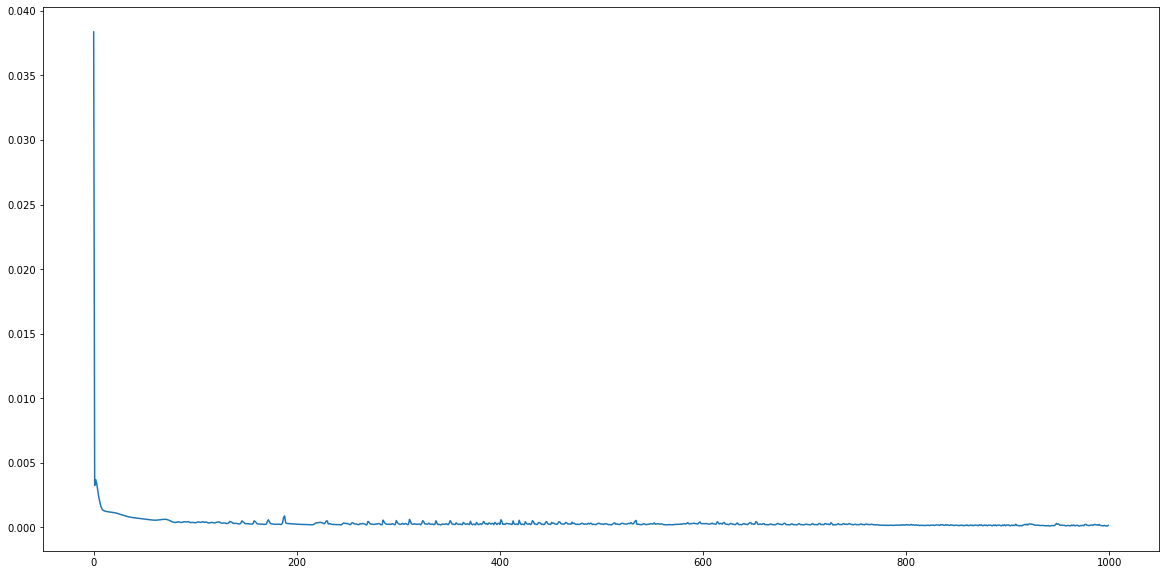

In [29]:
plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.show()

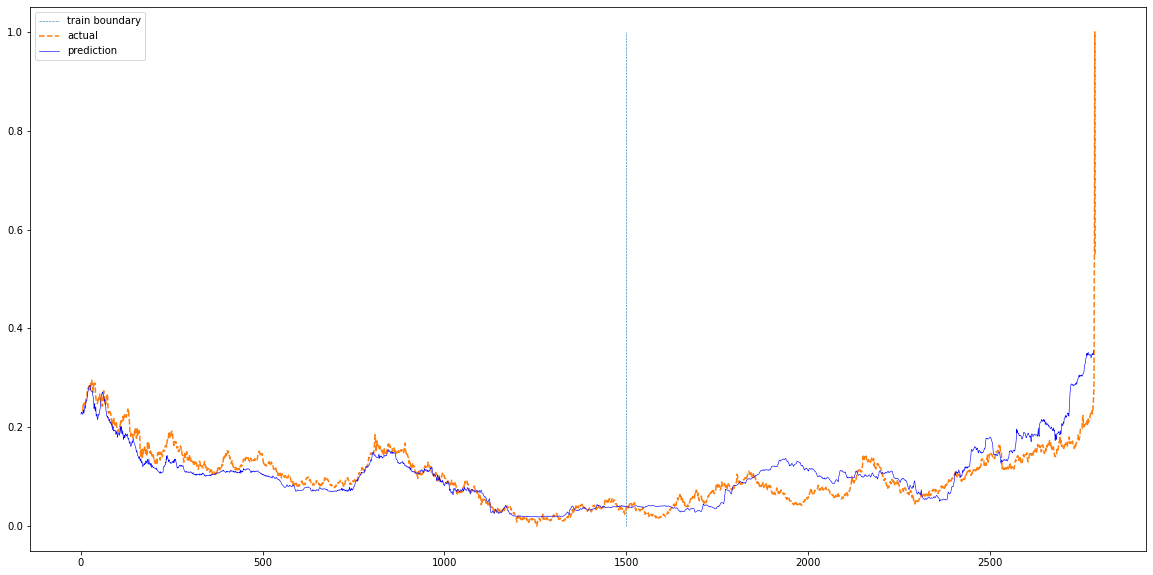

In [30]:
def plotting(train_loader, test_loader, actual):
        
    with torch.no_grad():
        train_pred = []
        test_pred = []

        for data in train_loader:
            seq, target = data
            out = model(seq)
            train_pred += out.cpu().numpy().tolist()

        for data in test_loader:
            seq, target = data
            out = model(seq)
            test_pred += out.cpu().numpy().tolist()
      
    total = train_pred + test_pred
    plt.figure(figsize=(20,10))
    plt.plot(np.ones(100)*len(train_pred), np.linspace(0,1,100), '--', linewidth=0.6)
    plt.plot(actual, '--')
    plt.plot(total, 'b', linewidth=0.6)

    plt.legend(['train boundary', 'actual', 'prediction'])
    plt.show()

plotting(train_loader, test_loader, df_scaled['Price'][sequence_length:])

In [ ]:
def seq_data(x, y, sequence_length):
  
    x_seq = []
    y_seq = []
    for i in range(len(x) - sequence_length):
        x_seq.append(x[i: i+sequence_length])
        y_seq.append(y[i+sequence_length])

    return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view([-1, 1]) 
    # float형 tensor로 변형, gpu사용가능하게 .to(device)를 사용.